**Import Tensorflow as Neural Network package**

In [1]:
import pandas as pd
import random 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

np.random.seed(11)
random.seed(11)

In [2]:
Data = pd.read_csv("../../../4 - Data/04_WorkingDatasets/Top50CombLagged/50CombLagged.csv")
Target = pd.read_csv("../../../4 - Data/04_WorkingDatasets/Top50CombLagged/TargetOutliersTreated.csv")

In [3]:
Target.head()

Data.drop(columns = ['Datum'], inplace = True)
Data.head()


,pm10_stundenmittelwerte_ug_m3,pm2_5_stundenmittelwerte_ug_m3,PM10 [ug/m3],PM2.5 [ug/m3],NO2 [ug/m3],NOX [ug/m3 eq. NO2],no2_stundenmittelwerte_ug_m3,CPC [1/cm3],Basel Wind Direction [10 m],Basel Wind Speed [10 m],...,Basel Wind Speed [10 m]_x_Hour,Basel Wind Direction [10 m]_x_Basel Wind Direction [10 m],Basel Wind Direction [10 m]_x_Hour,406v_sumLW_x_408n_sumLief,660n_sumPW_x_Gasverbrauch,Gasverbrauch_x_Gasverbrauch,Gasverbrauch_x_Hour,PM10_1h_lag,PM10_2h_lag,PM10_24h_lag
0,0.371266,0.764582,0.584737,1.069597,1.257089,1.099745,-0.244192,0.510222,-0.072930,-0.274121,...,-0.066647,-0.899970,-0.024535,0.180220,-0.797192,-0.524060,0.077300,0.096166,0.010001,5.637085
1,0.277764,0.702844,0.312302,0.826050,1.084973,0.836950,-0.300376,0.216428,-0.072930,-0.274121,...,-0.086139,-0.899970,-0.028848,-0.007550,-0.836568,-0.461916,0.127767,0.017932,0.096179,3.190429
2,0.142528,0.570258,0.244194,0.754418,0.985327,0.774379,-0.321300,0.090215,-0.182476,-0.092406,...,-0.064343,-0.877057,-0.056393,0.257705,-0.803201,-0.190723,0.238667,-0.185601,0.017946,1.511672
3,0.000139,0.468813,0.187437,0.725766,0.930975,0.993376,-0.364429,0.447317,-0.243955,0.085004,...,-0.016326,-0.854702,-0.085834,0.155832,-0.419150,0.571487,0.465321,-0.296032,-0.185588,-0.690209
4,-0.060573,0.395517,0.153382,0.697113,0.822270,1.093488,-0.289886,0.316550,-0.325020,0.157442,...,0.018813,-0.814787,-0.130890,-0.007550,-0.418985,1.439691,0.732485,-0.490289,-0.296019,-1.257621


In [4]:
n = Data.shape[0]
X = Data.copy()
y = Target["PM10_Combined_Trend_Residual"].copy()

# Split-Größen definieren
train_size = int(n * 0.7)  # 70% Training
val_size = int(n * 0.1)    # 10% Validierung
test_size = n - train_size - val_size  # 20% Test

# Training (älteste Daten)
X_train, y_train = X[:train_size], y[:train_size]

# Validierung (neuere Daten)
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]

# Test (neueste Daten)
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]


In [5]:
tf.random.set_seed(11)

model = Sequential([
    Dense(256, activation='relu', input_shape=(Data.shape[1],), kernel_regularizer=l2(0.025)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])


C:\Users\maxd2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

In [7]:
# Early Stopping Callback
early_stopping = EarlyStopping(
    patience=72,  # Training stoppt, wenn sich der Validierungs-Loss 5 Epochs lang nicht verbessert
    restore_best_weights=True  # Die besten Gewichte werden zurückgeladen
)

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=800, batch_size=16, callbacks=[early_stopping])


Epoch 1/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 31.0199 - mae: 3.5450 - mse: 28.3567 - val_loss: 26.1867 - val_mae: 2.3083 - val_mse: 23.9801
Epoch 2/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 10.8151 - mae: 2.1307 - mse: 8.7623 - val_loss: 23.0837 - val_mae: 2.0957 - val_mse: 21.4227
Epoch 3/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 9.4983 - mae: 1.9878 - mse: 7.9423 - val_loss: 21.9048 - val_mae: 2.1021 - val_mse: 20.6097
Epoch 4/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 8.3646 - mae: 1.9152 - mse: 7.1451 - val_loss: 20.4692 - val_mae: 2.1540 - val_mse: 19.4409
Epoch 5/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.8467 - mae: 1.8474 - mse: 6.8693 - val_loss: 19.4948 - val_mae: 1.9736 - val_mse: 18.6424
Epoch 6/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.3570 - mae: 1.8232 - mse: 6.5367 - val_loss: 19.3766 - val_mae: 2.0428 - val_mse: 18.6303
Epoch 7/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.15

In [9]:
results = model.evaluate(X_test, y_test)
print("Test loss, Test MAE, Test MSE:", results)


154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 14.2500 - mae: 2.4822 - mse: 13.6543
Test loss, Test MAE, Test MSE: [9.020215034484863, 2.2026519775390625, 8.424468040466309]


In [10]:
tf.random.set_seed(11)

model2 = Sequential([
    Dense(256, activation='relu', input_shape=(Data.shape[1],), kernel_regularizer=l2(0.025)),
    Dropout(0.35),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear'),
])

optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
# Early Stopping Callback
early_stopping = EarlyStopping(
    patience=72,  # Training stoppt, wenn sich der Validierungs-Loss 5 Epochs lang nicht verbessert
    restore_best_weights=True  # Die besten Gewichte werden zurückgeladen
)

history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=800, batch_size=16, callbacks=[early_stopping])

results = model2.evaluate(X_test, y_test)
print("Test loss, Test MAE, Test MSE:", results)


Epoch 1/800


C:\Users\maxd2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 37.9995 - mae: 4.0594 - mse: 35.2468 - val_loss: 28.8165 - val_mae: 2.5529 - val_mse: 26.4733
Epoch 2/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.8096 - mae: 2.4962 - mse: 11.6012 - val_loss: 24.8931 - val_mae: 2.2225 - val_mse: 23.0579
Epoch 3/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.3874 - mae: 2.3674 - mse: 10.6487 - val_loss: 23.4783 - val_mae: 2.1714 - val_mse: 21.9848
Epoch 4/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - loss: 10.9301 - mae: 2.2461 - mse: 9.5092 - val_loss: 22.0021 - val_mae: 2.0440 - val_mse: 20.7680
Epoch 5/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.4335 - mae: 2.2172 - mse: 9.2526 - val_loss: 20.8303 - val_mae: 2.0152 - val_mse: 19.7874
Epoch 6/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.2727 - mae: 2.1961 - mse: 9.2649 - val_loss: 20.3212 - val_mae: 2.0741 - val_mse: 19.4094
Epoch 7/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - loss: 9.8707

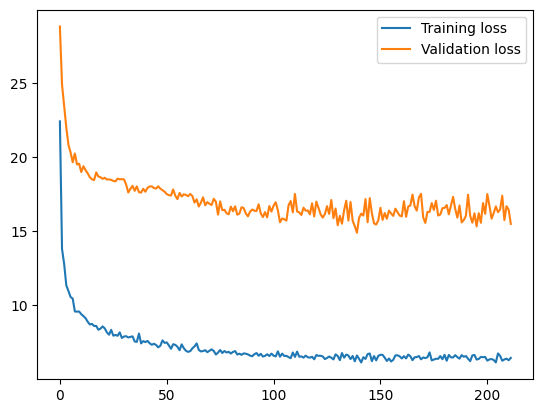

In [11]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'], label='Training loss')
plt.plot(history2.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()


# Taking the most promissing values from the last optimization loop try

Testing with L2: 0.025, LR: 0.001, Patience: 72, Batch size: 16 -> V1
Testing with L2: 0.01, LR: 0.001, Patience: 72, Batch size: 16 -> V2

In [12]:
tf.random.set_seed(11)

model3 = Sequential([
    Dense(512, activation='relu', input_shape=(Data.shape[1],), kernel_regularizer=l2(0.025)),
    Dropout(0.35),
    Dense(256, activation='relu'),
    Dropout(0.38),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])

optimizer = Adam(learning_rate=0.001)
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
# Early Stopping Callback
early_stopping = EarlyStopping(
    patience=72,  # Training stoppt, wenn sich der Validierungs-Loss 15 Epochen lang nicht verbessert
    restore_best_weights=True  # Die besten Gewichte werden zurückgeladen
)

#lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=15, min_lr=1e-6)



history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=800, batch_size=16, callbacks=[early_stopping])

results = model3.evaluate(X_test, y_test)
print("Test loss, Test MAE:", results)

Epoch 1/800


C:\Users\maxd2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1074/1074 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 27.2388 - mae: 3.3141 - mse: 24.2819 - val_loss: 26.7378 - val_mae: 2.3331 - val_mse: 24.3175
Epoch 2/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 11.4974 - mae: 2.1985 - mse: 9.2638 - val_loss: 23.8687 - val_mae: 2.1789 - val_mse: 22.0962
Epoch 3/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.9444 - mae: 2.0589 - mse: 8.3002 - val_loss: 22.0200 - val_mae: 2.0983 - val_mse: 20.6661
Epoch 4/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.8874 - mae: 1.9733 - mse: 7.6175 - val_loss: 21.3197 - val_mae: 2.0337 - val_mse: 20.2303
Epoch 5/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 8.2588 - mae: 1.9044 - mse: 7.2207 - val_loss: 20.5463 - val_mae: 2.0284 - val_mse: 19.6220
Epoch 6/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.0113 - mae: 1.8949 - mse: 7.1177 - val_loss: 19.7144 - val_mae: 2.0096 - val_mse: 18.8849
Epoch 7/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.4480 - mae: 1.

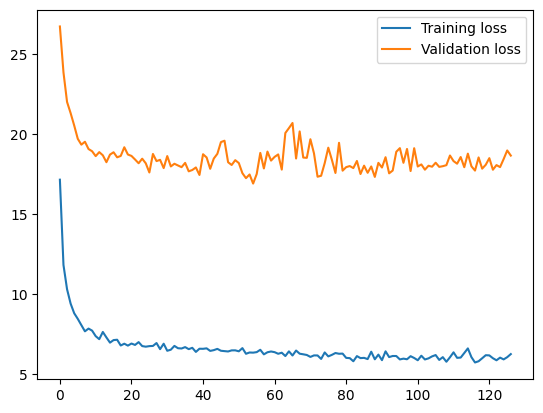

In [13]:
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'], label='Training loss')
plt.plot(history3.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()


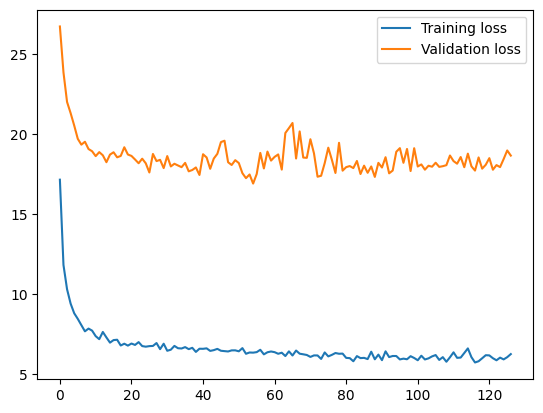

In [14]:
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'], label='Training loss')
plt.plot(history3.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()


In [15]:
tf.random.set_seed(11)

model4 = Sequential([
    Dense(256, activation='relu', input_shape=(Data.shape[1],), kernel_regularizer=l2(0.025)),
    Dropout(0.35),
    Dense(1, activation='linear'),
])

optimizer = Adam(learning_rate=0.001)
model4.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
# Early Stopping Callback
early_stopping = EarlyStopping(
    patience=72,  # Training stoppt, wenn sich der Validierungs-Loss 15 Epochen lang nicht verbessert
    restore_best_weights=True  # Die besten Gewichte werden zurückgeladen
)


history4 = model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=800, batch_size=16, callbacks=[early_stopping])

results = model4.evaluate(X_test, y_test)
print("Test loss, Test MAE:", results)


Epoch 1/800


C:\Users\maxd2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 51.0346 - mae: 4.7479 - mse: 47.9874 - val_loss: 29.1899 - val_mae: 2.6011 - val_mse: 26.7264
Epoch 2/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.5799 - mae: 2.0888 - mse: 8.3384 - val_loss: 24.9076 - val_mae: 2.2506 - val_mse: 23.2034
Epoch 3/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.6398 - mae: 1.8904 - mse: 7.0671 - val_loss: 22.6428 - val_mae: 2.1303 - val_mse: 21.3893
Epoch 4/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.8593 - mae: 1.8207 - mse: 6.6828 - val_loss: 21.3342 - val_mae: 2.0617 - val_mse: 20.3440
Epoch 5/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - loss: 7.3101 - mae: 1.7820 - mse: 6.3712 - val_loss: 20.2050 - val_mae: 1.9675 - val_mse: 19.3875
Epoch 6/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.9084 - mae: 1.7503 - mse: 6.1224 - val_loss: 19.5186 - val_mae: 1.9629 - val_mse: 18.8093
Epoch 7/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.7016 - mae: 